In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
!ls "/content/drive/My Drive/News"

Fake.csv  True.csv


In [ ]:
real = pd.read_csv("/content/drive/My Drive/News/True.csv")
fake = pd.read_csv("/content/drive/My Drive/News/Fake.csv")

In [ ]:
#Displayed the first 5 rows of the real news dataset
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
#Displayed the first 5 rows of the fake news dataset
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
#Shape of real news dataset
print("Real news: ",real.shape)
#Shape of fake news dataset
print("Fake News: ", fake.shape)

Real news:  (21417, 4)
Fake News:  (23481, 4)


In [ ]:
#Assigning a value of 0 for all real news data and placing it in the dataframe
class0 = []

for i in range(21417):
  class0.append(0)

real.insert(4, "class", class0, True)

In [ ]:
#Assigning a value of 1 for all fake news data and placing it in the dataframe
class1 = []

for i in range(23481):
  class1.append(1)

fake.insert(4, "class", class1, True)

In [ ]:
#Concactenating fake news and real news into 1 total dataset
total = pd.concat([real,fake])
total = total.sample(frac = 1)

In [ ]:
#Shape of total
total.shape

(44898, 5)

In [ ]:
#total = total.sample(frac=1)
pd.set_option('display.width', total.shape[0])
total.head()


,title,text,subject,date,class
7446,Taliban call on Trump to withdraw U.S. troops ...,KABUL (Reuters) - The Afghan Taliban on Wednes...,politicsNews,"November 9, 2016",0
7883,"Hurricane Matthew toll in Haiti rises to 1,000...",PORT-AU-PRINCE (Reuters) - Haiti started buryi...,politicsNews,"October 10, 2016",0
8413,"Judge orders State Department to review 14,900...",WASHINGTON (Reuters) - A judge ordered the U.S...,politicsNews,"August 22, 2016",0
16457,Israel willing to resort to military action to...,TOKYO (Reuters) - Israel is willing to resort ...,worldnews,"October 26, 2017",0
23227,SUNDAY WIRE REPLAY: LIVE Show Off-Air for Main...,ATTENTION: Episode #157 of SUNDAY WIRE SHOW is...,Middle-east,"October 16, 2016",1


In [ ]:
#Extract only the values for title (input) and class (output)
data = total[['title','class']]
data.head()


,title,class
7446,Taliban call on Trump to withdraw U.S. troops ...,0
7883,"Hurricane Matthew toll in Haiti rises to 1,000...",0
8413,"Judge orders State Department to review 14,900...",0
16457,Israel willing to resort to military action to...,0
23227,SUNDAY WIRE REPLAY: LIVE Show Off-Air for Main...,1


In [ ]:
# Character Length of Titles - Min, Mean, Max
print('Mean Length', data['title'].apply(len).mean())
print('Min Length', data['title'].apply(len).min())
print('Max Length', data['title'].apply(len).max())



Mean Length 80.11171989843646
Min Length 8
Max Length 286


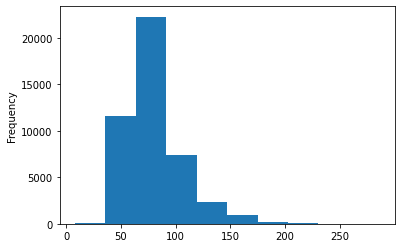

In [ ]:
#plotting the frequency of characters on a histogram
import seaborn as sns

x = data['title'].apply(len).plot.hist()

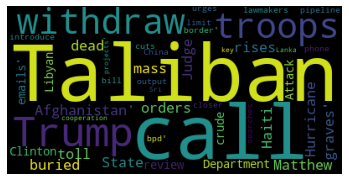

In [ ]:
#Word cloud of most common words from real news 
#For fake news, change ["class"] == 0 to 1
from wordcloud import WordCloud, STOPWORDS

#Note to self: fix for entire dataset
text = data[data["class"] == 0].values
wc = WordCloud(stopwords=STOPWORDS).generate(str(text))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
#Extracting numpy arrays for the title and classes
titles = data["title"].values
labels = data["class"].values



In [ ]:
#Data Preprocessing


#Lowercase letters
data['title'] = data['title'].str.lower()
data.head()


#Ensure that all necessary punctuations are in one list
#Include ' and " as they are not default

import string
#Fix this (note to self)
punc = list(string.punctuation)
punc.append('\'')
punc.append('"')
print(punc)


#Loop through dataframe and remove all punctuations
def removePunc(text):
    for i in string.punctuation:
        text = text.replace(i, '')
    return text


# Apply to the DF series
data['title'] = data['title'].apply(removePunc)
data.head()


#Import nltk preprocessing library to convert text into a readable format
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize


#Tokenize the string (create a list -> each index is a word)
data['title'] = data.apply(lambda row: nltk.word_tokenize(row['title']), axis=1)
data.head()

#Define text lemmatization model (eg: walks will be changed to walk)
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()


#Loop through title dataframe and lemmatize each word
def lemma(data):
  return [lemmatizer.lemmatize(w) for w in data]

#Apply to dataframe
data['title'] = data['title'].apply(lemma)

data.head()



#Define all stopwords in the English language (it, was, for, etc.)
from nltk.corpus import stopwords

stop = stopwords.words('english')
print(stopwords)
#Remove them from our dataframe
data['title'] = data['title'].apply(lambda x: [i for i in x if i not in stop])





data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', "'", '"']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<WordListCorpusReader in '/root/nltk_data/corpora/stopwords'>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,title,class
7446,"[taliban, call, trump, withdraw, u, troop, afg...",0
7883,"[hurricane, matthew, toll, haiti, rise, 1000, ...",0
8413,"[judge, order, state, department, review, 1490...",0
16457,"[israel, willing, resort, military, action, st...",0
23227,"[sunday, wire, replay, live, show, offair, mai...",1


In [ ]:
from sklearn.model_selection import train_test_split

#Split data into training and testing dataset
#We teach our model based on the training set (including the labels)
#We take the labels away to test our model with the testing set
title_train, title_test, y_train, y_test = train_test_split(titles, labels, test_size=0.2, random_state=1000)



In [ ]:
from gensim.models import Word2Vec
#Create a word2vec model
vec = Word2Vec(min_count=1,size=100)
#Build its vocabulary by looping through the title dataset
vec.build_vocab([x for x in title_train])
#Print the vocabular size
print(len(vec.wv.vocab))
#Train our word2vec model on all titles for 5 epochs
vec.train([x for x in title_train],total_examples=vec.corpus_count,epochs=5)

21299


(1616156, 1804935)

In [ ]:
#For this project, we will use Tensorflow-hub words
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/Wiki-words-250/2")

In [ ]:
#Convert each series of words to a word2vec embedding
indiv = []
for i in title_train:
  temp = np.array(embed(i))
 
  indiv.append(temp)
  

In [ ]:
#Accounts for different length of words
import tensorflow as tf

indiv = tf.keras.preprocessing.sequence.pad_sequences(indiv,dtype='float')

In [ ]:
# (35918 entries, maximum is 34 words, 250 is the vector size)
indiv.shape

(35918, 34, 250)

In [ ]:
#Convert each of the testing data series to a Word2Vec embedding
test = []

for i in title_test:
  temp = np.array(embed(i))
  test.append(temp)
  

In [ ]:
#Accounts for the different length of words in test data
test = tf.keras.preprocessing.sequence.pad_sequences(test,dtype='float')

In [ ]:
#Sequential model has a 50 cell LSTM layer before Dense layers
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.LSTM(50))
model.add(tf.keras.layers.Dense(20,activation='relu'))
model.add(tf.keras.layers.Dense(5,activation='relu'))

model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
#Compile model with binary_crossentropy loss, Adam optimizer, and accuracy metrics
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-4),loss="binary_crossentropy", metrics=['accuracy'])


In [ ]:
#Train model on 10 epochs
model.fit(indiv, y_train,validation_data=[test,y_test],epochs=10)

Epoch 1/10
1123/1123 [==============================] - 21s 13ms/step - loss: 0.4845 - accuracy: 0.8027 - val_loss: 0.4319 - val_accuracy: 0.8824
Epoch 2/10
1123/1123 [==============================] - 14s 12ms/step - loss: 0.4093 - accuracy: 0.8926 - val_loss: 0.4044 - val_accuracy: 0.8922
Epoch 3/10
1123/1123 [==============================] - 14s 12ms/step - loss: 0.3835 - accuracy: 0.9001 - val_loss: 0.3845 - val_accuracy: 0.8964
Epoch 4/10
1123/1123 [==============================] - 14s 12ms/step - loss: 0.3623 - accuracy: 0.9065 - val_loss: 0.3680 - val_accuracy: 0.8957
Epoch 5/10
1123/1123 [==============================] - 14s 12ms/step - loss: 0.3426 - accuracy: 0.9114 - val_loss: 0.3454 - val_accuracy: 0.9079
Epoch 6/10
1123/1123 [==============================] - 14s 12ms/step - loss: 0.3254 - accuracy: 0.9150 - val_loss: 0.3445 - val_accuracy: 0.8932
Epoch 7/10
1123/1123 [==============================] - 14s 12ms/step - loss: 0.3104 - accuracy: 0.9170 - val_loss: 0.3166 -

In [ ]:
#Test sample -> preprocess to extract word vectors
val = []

sample = np.array([['vaccines','do','not','work']])
for i in sample:
  temp = np.array(embed(i))
  val.append(temp)

In [ ]:
#Convert word vectors to a numpy array and run a prediction
val = np.array(val)
model.predict(val)

array([[0.2705441]], dtype=float32)

In [ ]:
#Download with pickle
import pickle 

pickle.dump(model, open('lstm.pkl','wb'))


INFO:tensorflow:Assets written to: ram://178806fe-4af0-44ad-a70a-39efd4247945/assets


INFO:tensorflow:Assets written to: ram://178806fe-4af0-44ad-a70a-39efd4247945/assets
